In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from PIL import Image
import cv2
import sys

sys.path.append('../src')
from utils import return_image_and_mask, plot_image_and_mask

In [2]:
!ls ../data/

data.md            new_valid.tar.gz   training_dataset   validation_dataset
new_train.tar.gz   train.tar.gz       valid.tar.gz


In [3]:
DATA_DIR = '../data'

In [4]:
# Get full image path by adding filename to base path

# Get the paths
train_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/training_dataset/**/*.jpg')])
val_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/validation_dataset/**/*.jpg')])

train_paths.sort()
val_paths.sort()

print(f"Train length: {len(train_paths)}")
print(f"Val length: {len(val_paths)}")

Train length: 537
Val length: 87


In [5]:
train_paths[0] + '.jpg'

'training_dataset/BM/BM10_1.jpg'

In [6]:
# Try opening an image and corresponding mask

idx = 112

path = train_paths[idx]

print(f"Image path: {path + '.jpg'}")

img, mask = return_image_and_mask(DATA_DIR, path)

Image path: training_dataset/BM/BM44_1.jpg


In [7]:
img.shape

(600, 800, 3)

In [8]:
mask.shape

(600, 800)

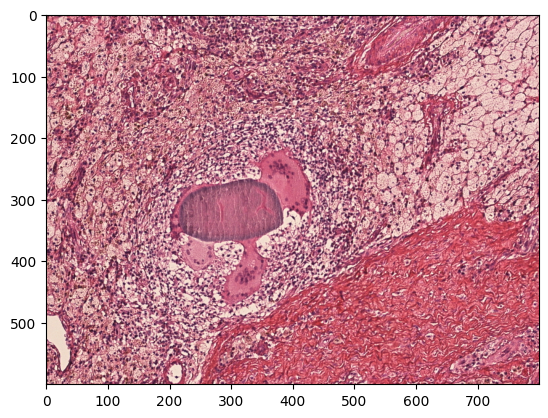

In [9]:
plt.imshow(img)
plt.show()

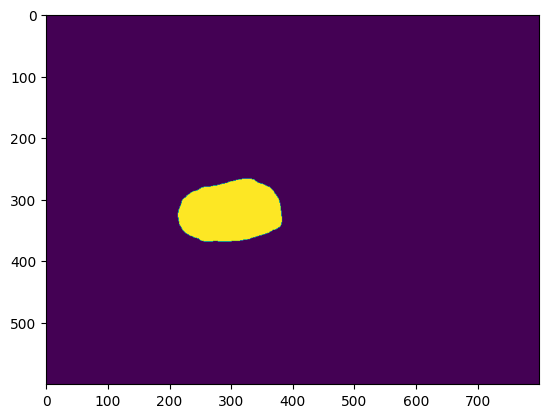

In [10]:
plt.imshow(mask)

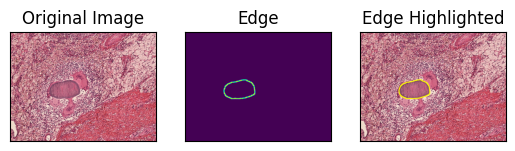

In [11]:
edges = cv2.Canny(mask,0,1)   # canny edge detector

edges = cv2.dilate(edges, np.ones((5, 5)))

img2 = img.copy()
img2[edges == 255] = [255, 255, 0]  # turn edges to yellow

plt.subplot(131),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges)
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img2)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])

plt.show()

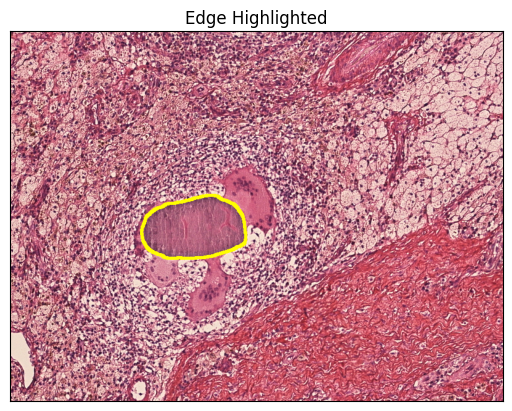

In [12]:
plt.imshow(img2)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
np.max(img.flatten())

255

In [14]:
for i, path in enumerate(train_paths):
  if 'BM37' in path:
    print(f'{i}: {path}')

84: training_dataset/BM/BM37_1
85: training_dataset/BM/BM37_2
86: training_dataset/BM/BM37_3
87: training_dataset/BM/BM37_5
88: training_dataset/BM/BM37_6


In [ ]:
# check size of every mask - if 3 channels then overwrite the file with one channel
for i, path in enumerate(train_paths):
    image, mask = return_image_and_mask(DATA_DIR, path)
    if mask.shape != (600, 800):
        print(f'problem at {i}: shape is {mask.shape}')
        single_channel_mask = mask[:, :, 0]
            
        # Convert the single-channel array back to an image
        single_channel_img = Image.fromarray(single_channel_mask)
        
        # Save the single-channel image, overwriting the original file
        single_channel_img.save(DATA_DIR + '/' + path + '_mask.tif')

        print('overwritten')
        

In [ ]:
# Show a bunch of images to check masks
for path in train_paths[300:500]:
    print(path)
    plot_image_and_mask(path)